<h1> Import necessary libraries </h1>

In [1]:
import pandas as pd 
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

print("Finished!")

Finished!


<h1> Ingesting data </h1>

In [13]:
# Read in data and create data frame; call it "reviews"
reviews = pd.read_csv("company_reviews.csv")
reviews

,month,year,state,status,summary,score,likes
0,Jun,2009,WA,Current Employee,"10,000 Boats forming on HUGE company",4,0
1,Oct,2009,WA,Former Employee,A company in Denial,2,2
2,Jan,2009,CA,Former Employee,A different company than probably any you'll w...,3,6
3,Jan,2009,CA,Former Employee,"A great company, but by no means perfect.",4,2
4,Jan,2009,WA,Current Employee,A learning experience...a stepping stone for s...,3,1
...,...,...,...,...,...,...,...
995,Apr,2018,TN,Current Employee,Ugh,3,1
996,Mar,2018,FL,Current Employee,Virtual Customer Service Rep,4,0
997,Apr,2018,CA,Current Employee,Ware house operations,4,0
998,May,2018,CA,Former Employee,Weaponization of culture,4,67


<h1> Linear regression </h1>

In [3]:
# Print out all column names
for col in reviews.columns: 
    print(col) 

month
year
state
status
summary
score
likes


In [6]:
# Choose your dependent variable (y) 
# Must be continuous for a linear regression
# We'll use likes

In [ ]:
# Choose your independent variables (x's)
# Start with: status, month

# What type are these?
# Status = binomial categorical text --> need to convert to binomial categorical numeric?
# Month = multinomial categorical text --> need to convert to dummies? 

# Maybe not... I'll show you a workaround

In [6]:
# Run a linear regression using your "y" and "x's" and print output
# Note that C() tells Python to treat those variables as categorical
# Note also that Python omits one value from the output
linear = ols('likes ~ C(status) + C(month)', data = reviews).fit() 

linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.417
Date:                Fri, 29 Jan 2021   Prob (F-statistic):            0.00432
Time:                        18:08:10   Log-Likelihood:                -2836.9
No. Observations:                1000   AIC:                             5700.
Df Residuals:                     987   BIC:                             5764.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.9885      0.503      3.954      0.000       1.002       2.975
C(status)[T.Former Employee ]     1.0401      0.277      3.760      0.000       0.497       1.583
C(month)[T.Aug]                  -0.9237      0.644     -1.435      0.152      -2.187       0.340
C(month)[T.Dec]                  -0.5167      0.693     -0.745      0.456      -1.877       0.844
C(month)[T.Feb]                   0.0470      0.722      0.065      0.948      -1.369       1.463
C(month)[T.Jan]                  -0.6819      0.668     -1.021      0.307      -1.992       0.628
C(month)[T.Jul]                  -0.2232      0.695     -0.321      0.748      -1.586       1.140
C(month)[T.Jun]                  -0.8607      0.700     -1.230      0.219      -2.234       0.513
C(month)[T.Mar]                  -1.3275      0.664     -1.999      0.046      -2.630      -0.024
C(month)[T.May]                   0.3788      0.679      0.558      0.577      -0.953       1.711
C(month)[T.Nov]                  -0.4565      0.658     -0.693      0.488      -1.749       0.836
C(month)[T.Oct]                  -1.1704      0.663     -1.766      0.078      -2.471       0.130
C(month)[T.Sep]                  -0.8956      0.641     -1.397      0.163      -2.154       0.363
==============================================================================
Omnibus:                     1310.208   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           251510.384
Skew:                           6.876   Prob(JB):                         0.00
Kurtosis:                      79.466   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# What if we didn't use the C() function?

In [26]:
# Alternative: what if you wanted to test whether reviews made in the month of January were liked 
# more or less than all other months? 

In [7]:
# Month: dummies
reviews = pd.get_dummies(reviews, columns=['month'])

In [8]:
# Look at list of column names again -- scroll to bottom -- what happened?
for col in reviews.columns: 
    print(col)

year
state
status
summary
score
likes
month_Apr
month_Aug
month_Dec
month_Feb
month_Jan
month_Jul
month_Jun
month_Mar
month_May
month_Nov
month_Oct
month_Sep


In [9]:
# Re-run your regression with the month_Jan only
linear_jan = ols('likes ~ C(status) + C(month_Jan)', data = reviews).fit() 

linear_jan.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     7.435
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           0.000623
Time:                        18:11:02   Log-Likelihood:                -2843.9
No. Observations:                1000   AIC:                             5694.
Df Residuals:                     997   BIC:                             5709.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.3921      0.168      8.279      0.000       1.062       1.722
C(status)[T.Former Employee ]     1.0627      0.276      3.854      0.000       0.522       1.604
C(month_Jan)[T.1]                -0.0941      0.467     -0.201      0.841      -1.011       0.823
==============================================================================
Omnibus:                     1326.938   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           267227.040
Skew:                           7.026   Prob(JB):                         0.00
Kurtosis:                      81.841   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# What about the relationship between likes and score?  Treat score as continuous.
# Re-run your regression with score as your x 
linear_score = ols('likes ~ score', data = reviews).fit() 

linear_score.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     75.76
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           1.31e-17
Time:                        18:13:53   Log-Likelihood:                -2814.8
No. Observations:                1000   AIC:                             5634.
Df Residuals:                     998   BIC:                             5643.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4951      0.448     12.266      0.000       4.616       6.374
score         -1.0611      0.122     -8.704      0.000      -1.300      -0.822
==============================================================================
Omnibus:                     1360.080   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           335881.154
Skew:                           7.275   Prob(JB):                         0.00
Kurtosis:                      91.597   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='score', ylabel='likes'>

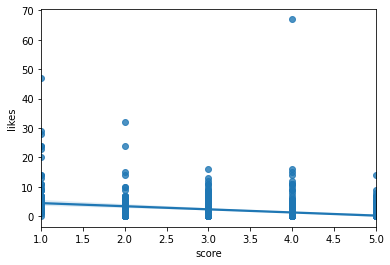

In [94]:
# Generate a regression plot to see what's happening
# [doesn't look as nice with categorical-ish x's]

sns.regplot(x = 'score', y = 'likes', data = reviews)

<h1> Logistic regression </h1>

In [ ]:
# Choose your dependent variable (y) 
# Must be a categorial binary/binomial variable for a logistic regression
# We'll use status

In [ ]:
# What type is this?
# Status = binomial categorical text --> need to convert to binomial categorical numeric?  Yes.

In [15]:
# Converting categorical text to categorical numbers; use 0/1 this time 
# Create a dictionary
status_dict = {'Former Employee': 0,'Former Employee ': 0,'Current Employee': 1, 'Current Employee ':1} 
reviews['status_num'] = [status_dict[item] for item in reviews.status]

In [ ]:
# Choose your independent variables (x's): score (as continuous), month

# What type are these?
# Score = continuous; ok as is
# Month = multinomial categorical text --> can handle with C() in logistic regression formula

In [16]:
# Run the regression
logit = sm.logit('status_num ~ score + C(month)', data=reviews).fit()  
logit.summary()

Optimization terminated successfully.
         Current function value: 0.632956
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             status_num   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      987
Method:                           MLE   Df Model:                           12
Date:                Fri, 29 Jan 2021   Pseudo R-squ.:                 0.02423
Time:                        18:25:47   Log-Likelihood:                -632.96
converged:                       True   LL-Null:                       -648.68
Covariance Type:            nonrobust   LLR p-value:                  0.001687
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0803      0.343     -0.234      0.815      -0.753       0.593
C(month)[T.Aug]    -0.2659      0.343     -0.775      0.438      -0.938       0.406
C(month)[T.Dec]    -0.3322      0.362     -0.916      0.359      -1.043       0.378
C(month)[T.Feb]    -0.1390      0.386     -0.361      0.718      -0.895       0.617
C(month)[T.Jan]    -0.5011      0.349     -1.434      0.152      -1.186       0.184
C(month)[T.Jul]    -0.7457      0.357     -2.088      0.037      -1.446      -0.046
C(month)[T.Jun]    -0.1814      0.371     -0.490      0.624      -0.908       0.545
C(month)[T.Mar]    -0.1794      0.352     -0.510      0.610      -0.869       0.510
C(month)[T.May]    -0.4315      0.354     -1.220      0.223      -1.125       0.262
C(month)[T.Nov]    -0.6245      0.343     -1.821      0.069      -1.296       0.047
C(month)[T.Oct]    -0.4407      0.347     -1.271      0.204      -1.120       0.239
C(month)[T.Sep]    -0.0687      0.344     -0.200      0.842      -0.743       0.606
score               0.2948      0.065      4.539      0.000       0.167       0.422
===================================================================================
"""

In [17]:
# Calculate marginal effects instead of log odds for the coefficients
logit.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:             status_num
Method:                          dydx
At:                           overall
===================================================================================
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
C(month)[T.Aug]    -0.0587      0.076     -0.776      0.438      -0.207       0.090
C(month)[T.Dec]    -0.0734      0.080     -0.918      0.359      -0.230       0.083
C(month)[T.Feb]    -0.0307      0.085     -0.361      0.718      -0.198       0.136
C(month)[T.Jan]    -0.1107      0.077     -1.439      0.150      -0.261       0.040
C(month)[T.Jul]    -0.1648      0.078     -2.105      0.035      -0.318      -0.011
C(month)[T.Jun]    -0.0401      0.082     -0.490      0.624      -0.200       0.120
C(month)[T.Mar]    -0.0396      0.078     -0.510      0.610      -0.192       0.113
C(month)[T.May]    -0.0953      0.078     -1.223      0.221      -0.248       0.057
C(month)[T.Nov]    -0.1380      0.075     -1.832      0.067      -0.286       0.010
C(month)[T.Oct]    -0.0974      0.076     -1.275      0.202      -0.247       0.052
C(month)[T.Sep]    -0.0152      0.076     -0.200      0.842      -0.164       0.134
score               0.0651      0.014      4.719      0.000       0.038       0.092
===================================================================================
"""